In [1]:
!pip install gensim

In [17]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [3]:
import gensim.downloader as api

# Load a pretrained model (smaller = faster to load and run)
wv_pretrained = api.load("glove-wiki-gigaword-100")

# Find most similar words
print(wv_pretrained.most_similar(
    positive=["king", "woman"],
    negative=["man"]
))

[==================================================] 100.0% 128.1/128.1MB downloaded
[('queen', 0.7698540687561035), ('monarch', 0.6843381524085999), ('throne', 0.6755736470222473), ('daughter', 0.6594556570053101), ('princess', 0.6520534157752991), ('prince', 0.6517034769058228), ('elizabeth', 0.6464517712593079), ('mother', 0.631171703338623), ('emperor', 0.6106470823287964), ('wife', 0.6098655462265015)]


In [5]:
from gensim.models import Word2Vec

# Sample corpus (replace with your real tokenized data)
sentences = [
    ['this', 'is', 'a', 'sample'],
    ['word2vec', 'model', 'with', 'gensim'],
    ['train', 'your', 'own', 'embeddings']
]

custom_wv_model = Word2Vec(
    sentences=sentences,
    sg=1,                 # Skip-gram
    vector_size=100,
    window=3,
    min_count=1,
    workers=4
).wv

# Example usage
print(custom_wv_model.most_similar('sample'))

[('your', 0.19912061095237732), ('train', 0.07497556507587433), ('with', 0.060591842979192734), ('a', 0.044689226895570755), ('this', 0.0377129502594471), ('own', 0.03364058583974838), ('embeddings', 0.027057481929659843), ('is', 0.026806797832250595), ('model', 0.008826158009469509), ('gensim', -0.06900332123041153)]


In [7]:
from gensim.models import FastText

# Example tokenized corpus
sentences = [
    ['hello', 'how', 'are', 'you'],
    ['fasttext', 'supports', 'subwords'],
    ['it', 'can', 'handle', 'rare', 'words'],
]

custom_fasttext_model = FastText(
    sentences=sentences,
    sg=1,                # Skip-gram model
    vector_size=100,     # Embedding dimensions
    window=3,            # Context window size
    min_count=1,         # Minimum word frequency
    workers=4            # Number of CPU cores to use
).wv                    # .wv gives access to trained word vectors

# Get vector for a word
print(custom_fasttext_model['fasttext'])

# Most similar words
print(custom_fasttext_model.most_similar('handle'))

[ 9.3540893e-04 -4.5109953e-04 -4.7258567e-04  1.1702325e-04
  6.8344036e-04  9.3575963e-04 -1.6304342e-03 -7.8891829e-04
 -1.6014793e-04 -2.1790760e-03 -2.6507976e-03  4.3747813e-04
  4.9890886e-04  1.2042996e-03  6.4096670e-04 -2.3866985e-03
  3.5789845e-04  1.1047089e-03  5.8790960e-04  7.0283201e-04
 -7.3491700e-04 -1.9162153e-03  1.8020131e-03  1.6453771e-04
  1.9796486e-05  9.4133808e-05  1.2195419e-04 -2.5218099e-04
 -8.8847918e-04 -2.5623353e-04 -1.3378292e-04 -1.9213760e-04
 -8.2293933e-04  1.0338301e-03 -2.6749091e-03  3.7705048e-04
  7.4897823e-04 -2.1760969e-04  9.6771267e-04  1.8948170e-03
 -4.3715438e-04  4.1976670e-04 -9.9141046e-04  1.3825184e-03
  1.4196739e-03 -1.3829478e-03  3.6268061e-04  5.3091699e-05
 -6.1812613e-04  2.3007310e-04 -1.5061080e-03 -6.8651186e-04
  5.6824129e-04  3.8750278e-04 -9.4411743e-04  9.0261636e-04
  3.3747259e-04 -3.1186242e-03  2.5791084e-04  1.2504817e-03
 -2.8321848e-04 -8.9766982e-04 -2.1613284e-03 -9.9776790e-04
 -7.3052931e-04  1.96243

# Part1

In [8]:
# Import required packages
import gensim.downloader as api

# Load the pretrained Word2Vec model (this will take time and ~1.6GB RAM)
print("Loading model... (this may take a few minutes)")
wv = api.load("word2vec-google-news-300")
print("Model loaded successfully!")

Loading model... (this may take a few minutes)
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded successfully!


In [9]:
words = ["computer", "india", "football", "doctor", "music"]

for word in words:
    print(f"\nTop 5 similar words to '{word}':")
    for similar_word, similarity in wv.most_similar(word, topn=5):
        print(f"  {similar_word} ({similarity:.4f})")


Top 5 similar words to 'computer':
  computers (0.7979)
  laptop (0.6640)
  laptop_computer (0.6549)
  Computer (0.6473)
  com_puter (0.6082)

Top 5 similar words to 'india':
  indian (0.6967)
  usa (0.6836)
  pakistan (0.6815)
  chennai (0.6676)
  america (0.6589)

Top 5 similar words to 'football':
  soccer (0.7314)
  fooball (0.7140)
  Football (0.7125)
  basketball (0.6682)
  footbal (0.6649)

Top 5 similar words to 'doctor':
  physician (0.7806)
  doctors (0.7477)
  gynecologist (0.6948)
  surgeon (0.6793)
  dentist (0.6785)

Top 5 similar words to 'music':
  classical_music (0.7198)
  jazz (0.6835)
  Music (0.6596)
  Without_Donny_Kirshner (0.6416)
  songs (0.6396)


In [10]:
# Example 1: king - man + woman ≈ queen
print("\nking - man + woman:")
print(wv.most_similar(positive=["king", "woman"], negative=["man"], topn=1))

# Example 2: paris - france + italy ≈ rome
print("\nparis - france + italy:")
print(wv.most_similar(positive=["paris", "italy"], negative=["france"], topn=1))

# Example 3: apple - iphone + android ≈ samsung
print("\napple - iphone + android:")
print(wv.most_similar(positive=["apple", "android"], negative=["iphone"], topn=1))


king - man + woman:
[('queen', 0.7118193507194519)]

paris - france + italy:
[('lohan', 0.5069674849510193)]

apple - iphone + android:
[('apples', 0.48944351077079773)]


# Part2

In [11]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec, FastText
import gensim.downloader as api
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
df = pd.read_csv("IMDB Dataset.csv")  # Make sure this CSV is present
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


sentiment
positive    25000
negative    25000
Name: count, dtype: int64


<Axes: >

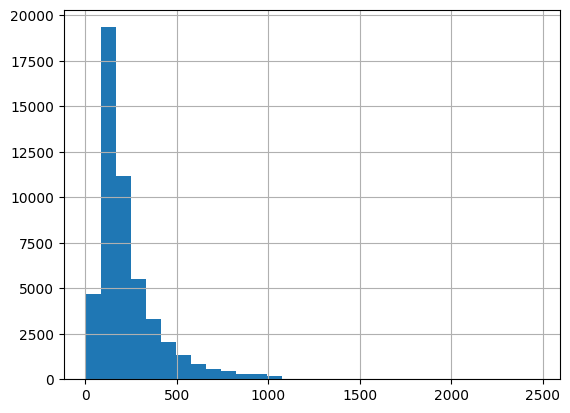

In [14]:
print(df['sentiment'].value_counts())
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
df['review_length'].hist(bins=30)

In [18]:
# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

# def clean_text(text):
#     text = re.sub(r'<.*?>', '', text)
#     text = text.lower()
#     text = re.sub(r"http\S+|www\S+|@\S+|[^a-zA-Z]", " ", text)
#     tokens = word_tokenize(text)
#     tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
#     return tokens

# df['tokens'] = df['review'].apply(clean_text)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = text.lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|@\S+|[^a-zA-Z]", " ", text)  # Remove URLs and special characters
    tokens = word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

# Apply to dataset
df['tokens'] = df['review'].apply(clean_text)

In [19]:
def document_vector(model, doc):
    doc = [word for word in doc if word in model]
    return np.mean(model[doc], axis=0) if len(doc) > 0 else np.zeros(model.vector_size)

In [20]:
#🧠 Model 1: Pre-trained Word2Vec Vectors
# Load pre-trained model
print("Loading pretrained word2vec-google-news-300...")
w2v = api.load("word2vec-google-news-300")

# Vectorize
X = np.array([document_vector(w2v, tokens) for tokens in df['tokens']])
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nPre-trained W2V Results:")
print(classification_report(y_test, y_pred))

Loading pretrained word2vec-google-news-300...

Pre-trained W2V Results:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [21]:
#🧠 Model 2: Custom Word2Vec Skip-gram
sg_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, sg=1, min_count=2, workers=4)
X_sg = np.array([document_vector(sg_model.wv, tokens) for tokens in df['tokens']])

X_train, X_test, y_train, y_test = train_test_split(X_sg, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nCustom Word2Vec (Skip-gram) Results:")
print(classification_report(y_test, y_pred))


Custom Word2Vec (Skip-gram) Results:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4961
           1       0.87      0.87      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [22]:
#🧠 Model 3: Custom Word2Vec CBoW
cbow_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, sg=0, min_count=2, workers=4)
X_cbow = np.array([document_vector(cbow_model.wv, tokens) for tokens in df['tokens']])

X_train, X_test, y_train, y_test = train_test_split(X_cbow, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nCustom Word2Vec (CBoW) Results:")
print(classification_report(y_test, y_pred))


Custom Word2Vec (CBoW) Results:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4961
           1       0.86      0.87      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [23]:
#🧠 Model 4: Custom FastText
ft_model = FastText(sentences=df['tokens'], vector_size=100, window=5, min_count=2, workers=4)
X_ft = np.array([document_vector(ft_model.wv, tokens) for tokens in df['tokens']])

X_train, X_test, y_train, y_test = train_test_split(X_ft, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nCustom FastText Results:")
print(classification_report(y_test, y_pred))


Custom FastText Results:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.84      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [26]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# import pandas as pd

# # Assuming you have:
# # X_train, X_test, y_train, y_test for pretrained Word2Vec
# # X_train_sg, X_test_sg for Skip-gram
# # X_train_cbow, X_test_cbow for CBoW
# # X_train_ft, X_test_ft for FastText

# # Define and train separate models
# model_pretrained = LogisticRegression(max_iter=1000)
# model_pretrained.fit(X_train, y_train)

# model_sg = LogisticRegression(max_iter=1000)
# model_sg.fit(X_train_sg, y_train)

# model_cbow = LogisticRegression(max_iter=1000)
# model_cbow.fit(X_train_cbow, y_train)

# model_ft = LogisticRegression(max_iter=1000)
# model_ft.fit(X_train_ft, y_train)

# # Evaluate each
# acc_pretrained = accuracy_score(y_test, model_pretrained.predict(X_test))
# acc_sg = accuracy_score(y_test, model_sg.predict(X_test_sg))
# acc_cbow = accuracy_score(y_test, model_cbow.predict(X_test_cbow))
# acc_ft = accuracy_score(y_test, model_ft.predict(X_test_ft))

# # Store in dataframe
# results = pd.DataFrame({
#     "Model": [
#         "Pretrained Word2Vec (Google News)",
#         "Custom Word2Vec (Skip-gram)",
#         "Custom Word2Vec (CBoW)",
#         "Custom FastText"
#     ],
#     "Accuracy": [
#         acc_pretrained,
#         acc_sg,
#         acc_cbow,
#         acc_ft
#     ]
# })

# print(results)